In [ ]:
!pip install networkx pennylane pandas matplotlib

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from adiaframe import Hamiltonian
#from adiaframe import utils_c as uc

/var/folders/wv/cwvgxcp14lxcs5jn0r6p87sr0000gn/T/ipykernel_8681/616370124.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Build your custom Hamiltonian with
import pennylane as qml

# 2 sites XXZ spin-1/2 chain (PBC)

coeffs_X = -0.5*np.ones(3)
coeffs_Z = np.ones(3)
coeffs = np.concatenate([coeffs_X, coeffs_Z])

print(coeffs)
ops = [qml.PauliX(0) @ qml.PauliX(1), qml.PauliX(1) @ qml.PauliX(2), qml.PauliX(2) @ qml.PauliX(0),
    qml.PauliZ(0) @ qml.PauliZ(1), qml.PauliZ(0) @ qml.PauliZ(1), qml.PauliZ(0) @ qml.PauliZ(1)]

H_XXZ = qml.Hamiltonian(coeffs, ops) 
H_XXZ = np.matrix(qml.matrix(H_XXZ))
print(H_XXZ)
#H = #np.array(...) 2D matrix
hamiltonian = Hamiltonian(H_XXZ, commute_map=True)
# or 
# pauli_sample = {"Pstring": coefficient, ...}
# H = Hamiltonian.p_poly_to_H(pauli_sample)
# hamiltonian = Hamiltonian(H, pauli_basis=pauli_sample, commute_map=True)

[-0.5 -0.5 -0.5  1.   1.   1. ]
[[ 3. +0.j  0. +0.j  0. +0.j -0.5+0.j  0. +0.j -0.5+0.j -0.5+0.j  0. +0.j]
 [ 0. +0.j  3. +0.j -0.5+0.j  0. +0.j -0.5+0.j  0. +0.j  0. +0.j -0.5+0.j]
 [ 0. +0.j -0.5+0.j -3. +0.j  0. +0.j -0.5+0.j  0. +0.j  0. +0.j -0.5+0.j]
 [-0.5+0.j  0. +0.j  0. +0.j -3. +0.j  0. +0.j -0.5+0.j -0.5+0.j  0. +0.j]
 [ 0. +0.j -0.5+0.j -0.5+0.j  0. +0.j -3. +0.j  0. +0.j  0. +0.j -0.5+0.j]
 [-0.5+0.j  0. +0.j  0. +0.j -0.5+0.j  0. +0.j -3. +0.j -0.5+0.j  0. +0.j]
 [-0.5+0.j  0. +0.j  0. +0.j -0.5+0.j  0. +0.j -0.5+0.j  3. +0.j  0. +0.j]
 [ 0. +0.j -0.5+0.j -0.5+0.j  0. +0.j -0.5+0.j  0. +0.j  0. +0.j  3. +0.j]]


/Users/hyunseongkim/miniconda3/envs/quantum_computer/lib/python3.11/site-packages/pandas/core/dtypes/astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


In [3]:
# See Pauli term and their coefficient:
hamiltonian.local_decomposition.tail(10)

,Pstring,type,Z,X,Coef
0,ZZI,0,6,0,3.0
1,IXX,1,0,3,-0.5
2,XIX,1,0,5,-0.5
3,XXI,1,0,6,-0.5


In [4]:
#hamiltonian.local_decomposition.pivot(index="X", columns="Z", values="Coef")

The below properties are automatically generated.

In [5]:
hamiltonian.commute_map

,source,target,Zs,Xs,Zt,Xt,commute
0,ZZI,IXX,6,0,0,3,0
1,ZZI,XIX,6,0,0,5,0
2,ZZI,XXI,6,0,0,6,1
3,IXX,XIX,0,3,0,5,1
4,IXX,XXI,0,3,0,6,1
5,XIX,XXI,0,5,0,6,1


In [6]:
hamiltonian.graph_edge

,source,target,Zs,Xs,Zt,Xt,commute
0,ZZI,IXX,6,0,0,3,0
1,ZZI,XIX,6,0,0,5,0
2,ZZI,XXI,6,0,0,6,1
3,IXX,XIX,0,3,0,5,1
4,IXX,XXI,0,3,0,6,1
5,XIX,XXI,0,5,0,6,1


In [7]:
#hamiltonian.latin_matrix # error
# See Latin matrix
#fig, ax = plt.subplots(1,1, figsize=(10, 10))
#ax.spy(hamiltonian.latin_matrix, markersize=10)
#ax.set_xlabel("Z family")
#ax.xaxis.set_label_position('top') 
#ax.set_ylabel("X family")

In [8]:
from adiaframe import graph_op
from copy import deepcopy
from networkx.algorithms.approximation import max_clique 
# It only works for binary graph indicating commuting map.

In [9]:
G_b = graph_op.get_binary_graph(hamiltonian) # get commuting graph

In [10]:
g_classic = deepcopy(G_b)
max_cliques = []
while len(g_classic.nodes) >0:
    clique = max_clique(g_classic)
    max_cliques.append(clique)
    for node in clique:
        g_classic.remove_node(node)

In [11]:
print("Classic Clique solver:")
print("Partition:", len(max_cliques))
for c in max_cliques:
    print(len(c), end=", ")
print("============================================")
for c in max_cliques:
    print(c)

Classic Clique solver:
Partition: 2
2, 2, ============================================
{'XIX', 'IXX'}
{'ZZI', 'XXI'}


In [12]:
hamiltonian.local_decomposition

,Pstring,type,Z,X,Coef
0,ZZI,0,6,0,3.0
1,IXX,1,0,3,-0.5
2,XIX,1,0,5,-0.5
3,XXI,1,0,6,-0.5


In [13]:
np.abs(complex(0.5,0.2))

0.5385164807134504

In [14]:
from adiaframe.utils import evolve_circuit

In [15]:
N = hamiltonian.qubit_num # number of qubits
dev = qml.device('default.qubit', wires=N +5, shots=1000)

In [57]:
a = 0
#@qml.defer_measurements
@qml.qnode(dev)
def evolve_hamiltonian(h:Hamiltonian, max_cliques:list, t:float, iter:int):
    for i in range(N):
        qml.Hadamard(i)
    qml.Barrier(wires=range(N ))
    for k in range(iter):
        i=0
        for c in max_cliques:
            for p in c:
                coef = h.local_decomposition.loc[h.local_decomposition["Pstring"] == p]["Coef"].iloc[0]
                evolve_circuit(
                    p,
                    0, 
                    coef,
                    t,
                    True #imaginary
                )
                qml.Barrier(wires=range(N))
                i+=1
                # mid-measurement
                m0 = qml.measure(N, postselect=0)#-requires new wires for each mid-measurement.
                #qml.cond((m0 == 1), qml.Hadamard)(N+1)
                #m1 = (qml.measure(N +1))
                #qml.cond(m0 == 1 and m1 == 0, qml.PauliX)(N+1)
                #if m0 == 1:
                #    print("Failed")
                #    break
                #
            #if m0==1:
            #    break
    hermit = qml.Hermitian(h.Hamiltonian, wires=range(N ))
    return qml.expval(hermit)
    #return qml.probs()

In [58]:
N

3

In [59]:
t = 0.1

/var/folders/wv/cwvgxcp14lxcs5jn0r6p87sr0000gn/T/ipykernel_8681/2477765743.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


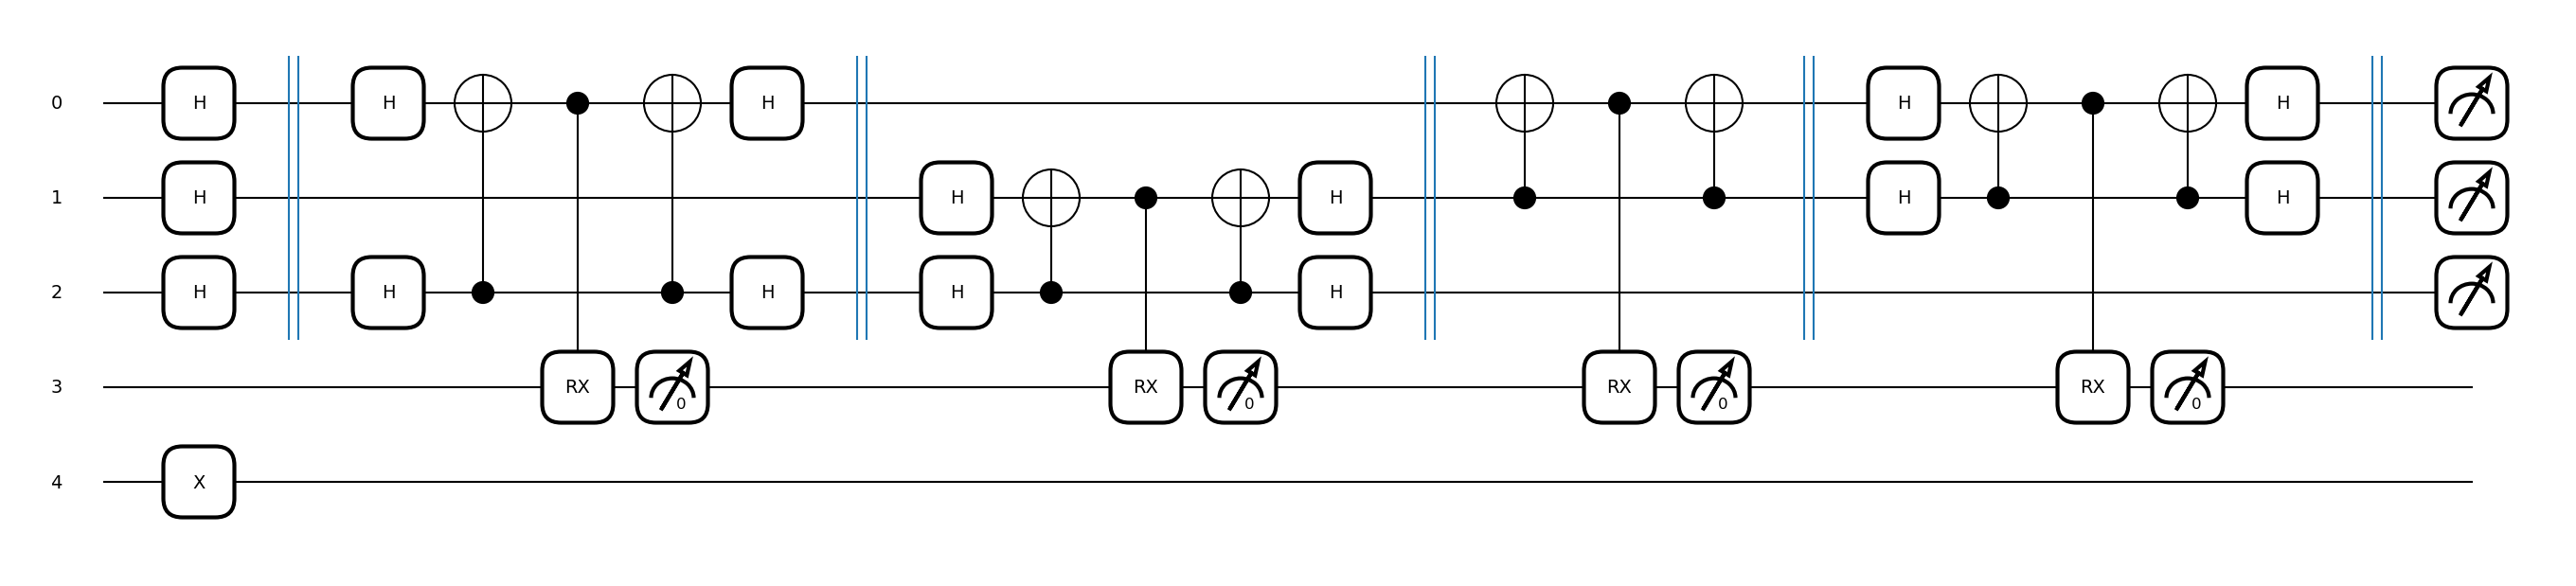

In [60]:
fig, ax = qml.draw_mpl(evolve_hamiltonian)(hamiltonian, max_cliques, t, 1)
fig.show()

In [61]:
a

0

In [71]:
t = 0.16
dt = 0.01


In [78]:
evolve_hamiltonian(hamiltonian, max_cliques, dt, 6)

-0.5086401028966351

In [70]:
for i in range(1,6):
    print(i*dt, evolve_hamiltonian(hamiltonian, max_cliques, dt, i))

0.01 -1.2771699334312125
0.02 -1.2879660031374565
0.03 -1.0924641986263948
0.04 -0.8584445710518318
0.05 -0.7305827460539446


In [ ]:
evolve_hamiltonian(hamiltonian, max_cliques, dt, i)

In [ ]:
from itertools import product

In [ ]:
xlabel = ["".join(s) for s in list(product(["0", "1"], repeat=4))] #????

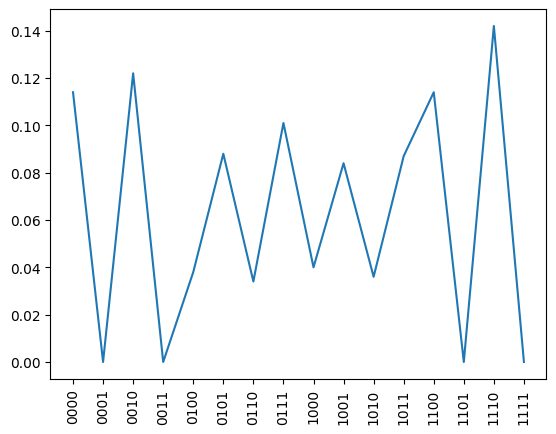

In [ ]:
fig, ax = plt.subplots(1,1, )
ax.plot(xlabel, probs)
ax.tick_params(axis='x', rotation=90)